# Spectral clustering

<p style="font-family:verdana; font-size:15px">Spectral clustering techniques make use of the <b>spectrum (eigenvalues)</b> of the <b>Laplacian matrix</b> of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.
</p>


<p style="font-family:verdana; font-size:15px">
<b>Algorithm overview</b>  
1) Define the affinity matrix (Laplacian matrix)  
2) Identify eigenvalues and eigenvectors. (The corresponding eigenvector contains the cluster indicator for each data point)  
3) K-means of transformed data  
4) Project back to original space
</p>

<p style="font-family:verdana; font-size:15px">How to constructe the <b>Laplacian matrix $L$</b> </p>

\begin{equation}
L= D-W
\end{equation}
<p style="font-family:verdana; font-size:15px">where $D$ is degree matrix, $W$ is the similarity matrix. </p>

<p style="font-family:verdana; font-size:15px">
<b>To understand why does it works</b>  

Basic idea: cutting the edge with lowest weights  

\begin{equation}
\min Cut(C_1, C_2) = \sum_{i \in C_1} \sum_{j\in C_2} w_{ij}
\end{equation}

Normailized minimaul cut:  

\begin{equation}
\min NCut(C_1,C_2) = \min \frac{ Cut(C_1, C_2)} {Vol(C_1)} + \frac{ Cut(C_1, C_2)} {Vol(C_2)} = \min (\frac{1}{Vol(C_1)} + \frac{1}{Vol(C_2)} ) Cut(C_1, C_2)
\end{equation}
where $Vol(C) = \sum_{i \in C} D(x_i)$  


\begin{equation}
NCut(A,B) = \frac{y^{\top} (D-W) y}{ y^{\top} Dy}
\end{equation}

\begin{equation}
\min_y y^{\top} (D-W) y\ \ subject\ to\ \  y^{\top} Dy = 1
\end{equation}

Eigenvalues of the Laplacian are approximate solutions to mincut problem

</p>


# Spectral clustering for image segmentation




<p style="font-family:verdana; font-size:15px">
In this example, an image with connected circles is generated and
spectral clustering is used to separate the circles.
</p>

<p style="font-family:verdana; font-size:15px">
In these settings, the <b>`spectral_clustering`</b> approach solves the problem
know as <b>'normalized graph cuts'</b>: the image is seen as a graph of
connected voxels, and the spectral clustering algorithm amounts to
choosing graph cuts defining regions while minimizing the ratio of the
gradient along the cut, and the volume of the region.
</p>




<p style="font-family:verdana; font-size:15px">
As the algorithm tries to balance the volume (ie balance the region
sizes), if we take circles with different sizes, the segmentation fails.
</p>


<p style="font-family:verdana; font-size:15px">
In addition, as there is no useful information in the intensity of the image,
or its gradient, we choose to perform the spectral clustering on a graph
that is only weakly informed by the gradient. This is close to performing
a Voronoi partition of the graph.
</p>


<p style="font-family:verdana; font-size:15px">
In addition, we use the mask of the objects to restrict the graph to the
outline of the objects. In this example, we are interested in
separating the objects one from the other, and not from the background.
</p>


In [ ]:
%matplotlib inline

In [6]:
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

#crate circles

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2



Automatically created module for IPython interactive environment


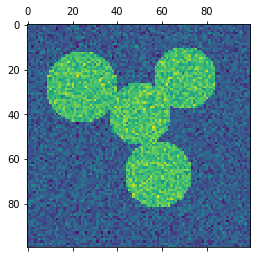

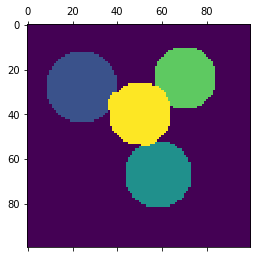

In [4]:
# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack') #eigen_solver: The eigenvalue decomposition strategy to use.



label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)


<p style="font-family:verdana; font-size:15px">
parameters in spectral_clustering  

<url> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering</url>
</p>

In [ ]:

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()